# **Analise Preditiva - Trabalho 2**

Nome: Leonardo Alves Dias

Matricula:202203140248

Curso: MBA em BI e Data Science

Disciplina: Análise Preditiva e Vantagem Competitiva

Professor: Sérgio Monteiro

linkedin: https://br.linkedin.com/in/leonardo-alves-03702928?original_referer=https%3A%2F%2Fwww.google.com.br%2F


# **Instalação dos Pacotes**

In [109]:
# Instalando o yahoo finance
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [110]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [111]:
pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Importação dos Pacotes**

In [112]:
import pandas as pd
import numpy as np
import yfinance as yf #Instalando e importando a API no código
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# **Baixando Codigo dos 10 Ativos**

In [113]:
tabela_empresas = pd.read_excel('https://github.com/leodiasx99/Diabetes/blob/main/Empresas.xlsx?raw=true', sheet_name = "Plan1")
tabela_empresas

,Empresas
0,CMIG3.SA
1,ENGI11.SA
2,CPFE3.SA
3,CPLE6.SA
4,EGIE3.SA
5,ELET3.SA
6,ENBR3.SA
7,LIGT3.SA
8,TAEE11.SA
9,VALE3.SA


# **Baixando Dados e Vizualisando**



CMIG3.SA
[*********************100%***********************]  1 of 1 completed


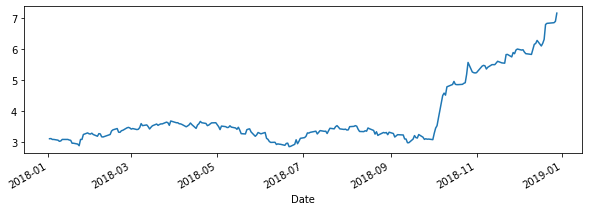

ENGI11.SA
[*********************100%***********************]  1 of 1 completed


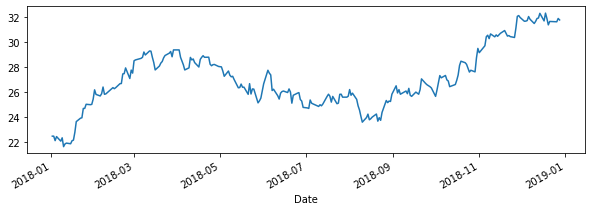

CPFE3.SA
[*********************100%***********************]  1 of 1 completed


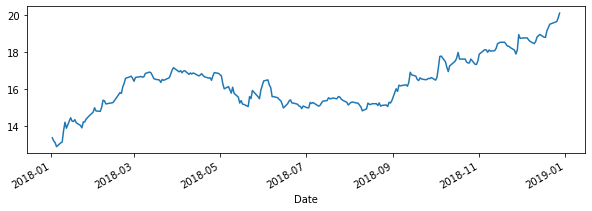

CPLE6.SA
[*********************100%***********************]  1 of 1 completed


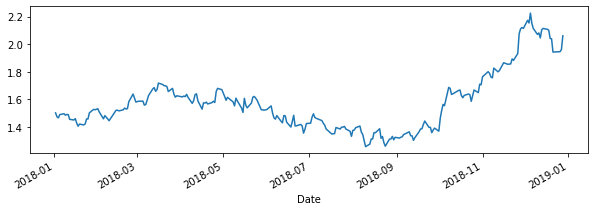

EGIE3.SA
[*********************100%***********************]  1 of 1 completed


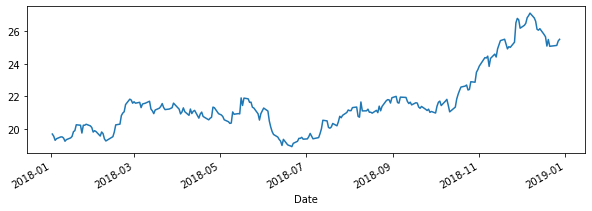

ELET3.SA
[*********************100%***********************]  1 of 1 completed


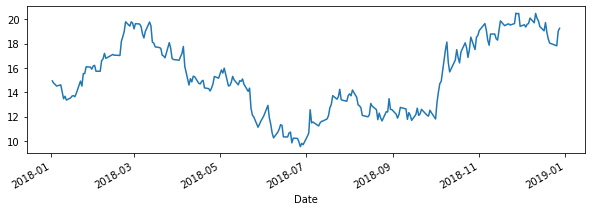

ENBR3.SA
[*********************100%***********************]  1 of 1 completed


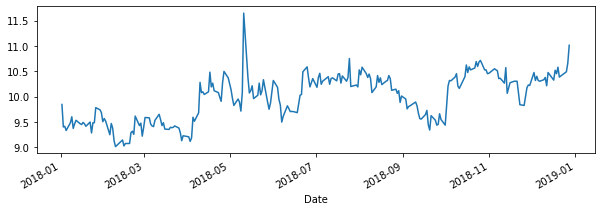

LIGT3.SA
[*********************100%***********************]  1 of 1 completed


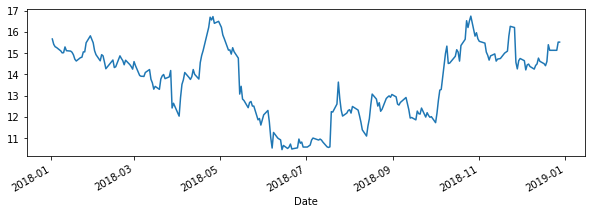

TAEE11.SA
[*********************100%***********************]  1 of 1 completed


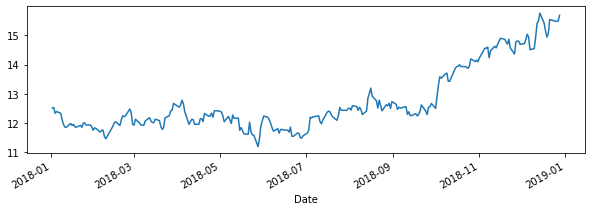

VALE3.SA
[*********************100%***********************]  1 of 1 completed


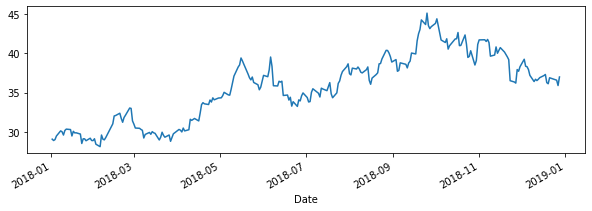

In [114]:
for ativos in tabela_empresas['Empresas']:
  print(ativos)
  dados_series = yf.download(ativos, start="2018-01-01", end="2019-01-01")
  #display(dados_series)
  dados_series["Adj Close"].plot(figsize=(10,3))
  plt.show()

# **Resultado das Predições das 10 ações**

As predições foram realizadas indiviualmente, apenas alterando a ação , utilizando o código o código utlizando em aula no link: https://github.com/sergiomonteiro76/projeto_aplicado/blob/main/projeto_aplicado_introducao_financas.ipynb

do periodo de 2018 > 2022




In [115]:
tabela_predição = pd.read_excel('https://github.com/leodiasx99/Diabetes/blob/main/Empresas_Predict.xlsx?raw=true', sheet_name = "Plan1")
tabela_predição

,Empresas,pred_result
0,CMIG3.SA,0.277846
1,CPFE3.SA,0.135355
2,CPLE6.SA,0.226260
3,EGIE3.SA,0.141924
4,ELET3.SA,0.182964
5,ENBR3.SA,0.233951
6,ENGI11.SA,0.179990
7,LIGT3.SA,0.121027
8,TAEE11.SA,0.242345
9,VALE3.SA,0.167729


# **Utilização do Problema da Mochiila para selecionar apenas 3 ações**

**Instalação do pacote mip**

In [116]:
!pip install mip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [117]:
from mip import Model, maximize, xsum, CBC, BINARY, OptimizationStatus

In [118]:
ativos_considerados = tabela_predição['Empresas']
coef_funcao_objetivo = tabela_predição['pred_result']
coef_restr = [1,1,1,1,1,1,1,1,1,1]
termo_independente = 3 

In [119]:
I = range(len(coef_funcao_objetivo))
m = Model("knapsack")

In [120]:
x = [m.add_var(var_type=BINARY) for i in I]

In [121]:
m.objective = maximize(xsum(coef_funcao_objetivo[i] * x[i] for i in I))

In [122]:
m += xsum(coef_restr[i] * x[i] for i in I) <= termo_independente
print(f'O modelo tem {m.num_cols} variável(eis), {m.num_rows} restrição(ões) e {m.num_nz} zero(s)')

O modelo tem 10 variável(eis), 1 restrição(ões) e 10 zero(s)


In [123]:
status = m.optimize(max_seconds=2)

In [124]:
status == OptimizationStatus.OPTIMAL

True

In [125]:
itens_selecionados = ["x"+str(i+1) for i in I if x[i].x >= 0.99]
print("Itens selecionados: {}".format(itens_selecionados))

Itens selecionados: ['x1', 'x6', 'x9']


# **Análise dos Resultados Obtidos**

1 - As ações do setor de energia tiveram tiveram uma leve alta entre os perdiodos de 2016 e 2019

2 - Utilizando o Problema da mochila foram selecionados as ações abaixo com as devidas predições:

In [126]:
tabela_predição.loc[[(i+1) for i in I if x[i].x >= 0.99]]

,Empresas,pred_result
1,CPFE3.SA,0.135355
6,ENGI11.SA,0.179990
9,VALE3.SA,0.167729
